# House Prices

House Prices competition is a competition that challenge competitors to predict sale price of houses using regression models. The evaluation metric to calculate score in this competition is a root mean squared error (RMSE).

Let's start import all necessary packages

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

Import train and test data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd. read_csv('data/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

Dataset contain mixture types of data both categorial and ordinal features. The training set contains 1460 observations and 80 features while there are 1459 observations in the test data.

## Outlier

To make a good regression, we must be careful about outliers. Thus, let's check at the SalePrice, which is our target, and area's features (LotArea, GrLivArea) first.

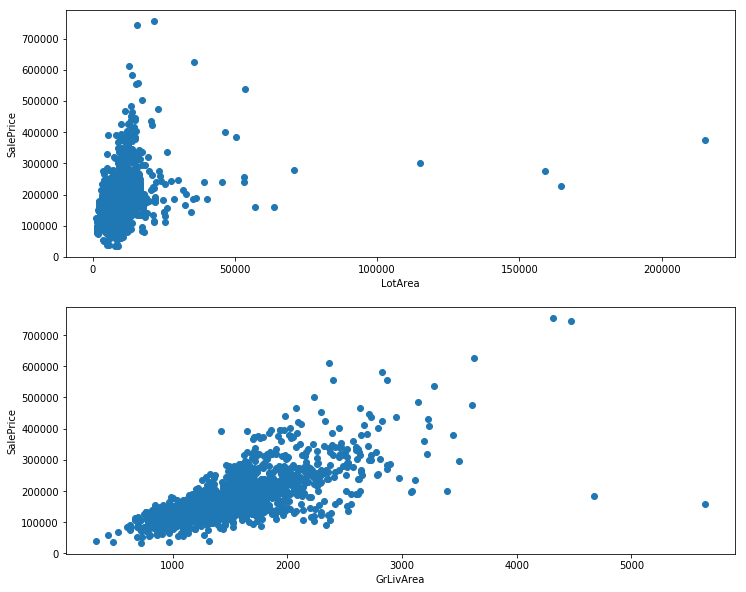

In [6]:
plt.figure(figsize=[12,10])
plt.subplot(211)
plt.scatter(train.LotArea, train.SalePrice)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.subplot(212)
plt.scatter(train.GrLivArea, train.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

The figures show that there are two outlier of Saleprices, and some from LotArea (lot size in square feet) and GrLivArea (ground living area in square feet), so those outliers were eliminated by setting level of maximum LotArea and GrLivArea.

In [7]:
train = train[train.LotArea < 100000]
train = train[train.GrLivArea < 4000]

## Data Preprocessing

In the figure below, we can see that the SalePrice data are right skewed. This skewness could lead to upward bias in the prediction since the observation with higher house price will affect errors more than the lower one. To solve the problem, I decide to take natural logarithm of one plus on SalePrice so that all observations will be treated equally

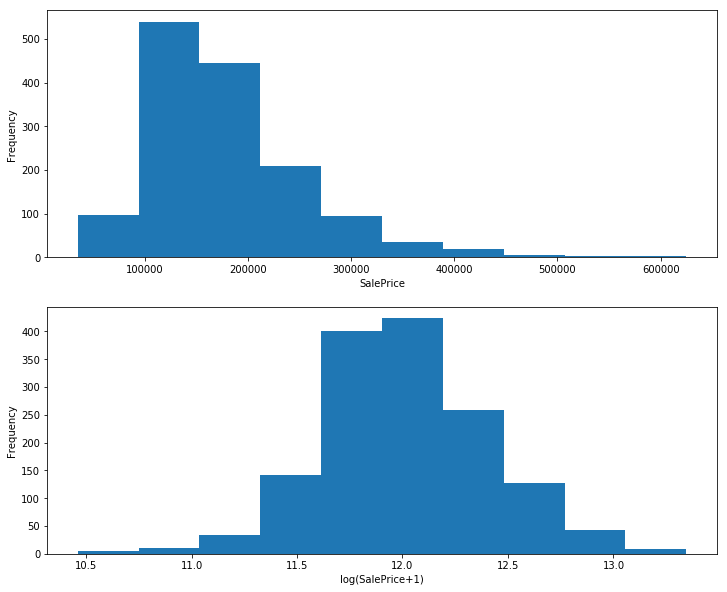

In [8]:
plt.figure(figsize=[12,10])
plt.subplot(211)
plt.hist(train["SalePrice"])
train["SalePrice"] = np.log1p(train["SalePrice"])
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.subplot(212)
plt.hist(train["SalePrice"])
plt.xlabel("log(SalePrice+1)")
plt.ylabel("Frequency")
plt.show()

Furthermore, there are some categorial variables that are in the form of numeric which are MSSubClass (type of dwelling involved in the sale) and MoSold (Month Sold). Those 2 variables are converted back to a categorial form.

In [9]:
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

## Missing Values

In [10]:
n_missing = train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]

print('Number of missing value')
print(n_missing[n_missing>0].sort_values(ascending=False))
print('\nPercentage of missing value')
print(percent_missing[percent_missing>0].sort_values(ascending=False))

Number of missing value
PoolQC          1447
MiscFeature     1400
Alley           1361
Fence           1172
FireplaceQu      690
LotFrontage      256
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Percentage of missing value
PoolQC          0.996556
MiscFeature     0.964187
Alley           0.937328
Fence           0.807163
FireplaceQu     0.475207
LotFrontage     0.176309
GarageYrBlt     0.055785
GarageType      0.055785
GarageFinish    0.055785
GarageQual      0.055785
GarageCond      0.055785
BsmtFinType2    0.026171
BsmtExposure    0.026171
BsmtFinType1    0.025482
BsmtCond        0.025482
BsmtQual        0.025482
MasVnrArea      0.005510
MasVnrType      0.005510
Electrical      0.000689
dtype: float64


There are 6 features that has more than 10% of missing data in dataset so it has been removed because filling too many missing values could affect the model performance.

In [11]:
# drop features that has more than 10% of missing data 
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)

## Feature Processing

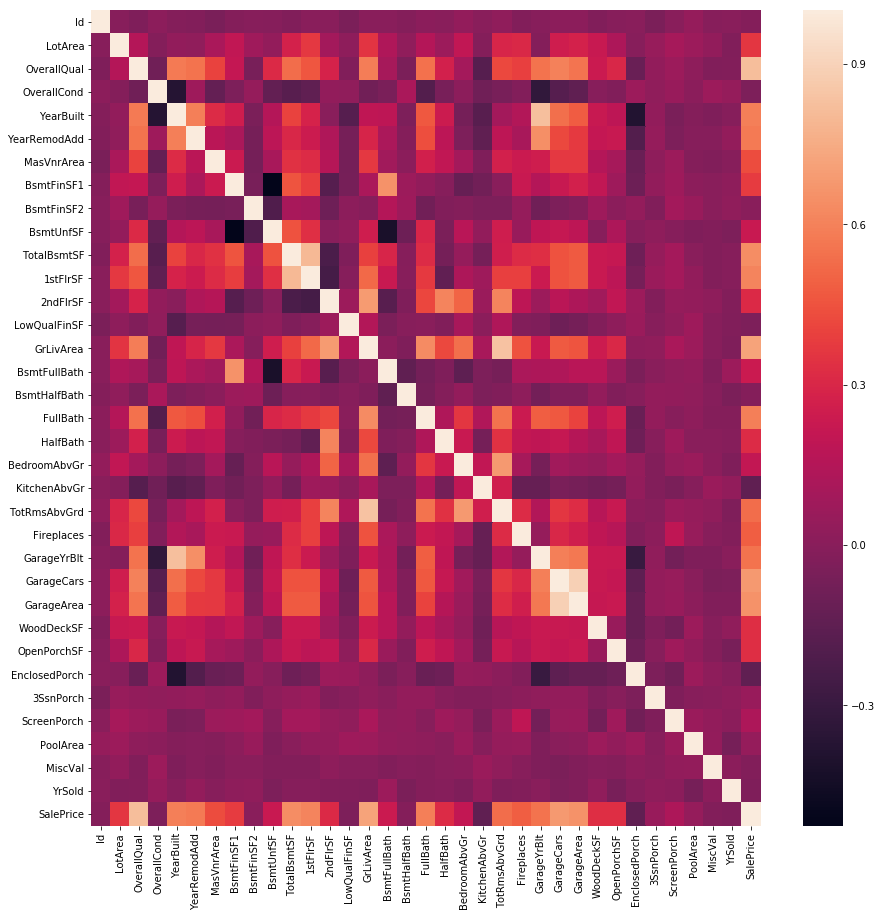

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train.corr())
plt.show()

The correlation heatmap of numeric features shows some interesting insights. There are many features that are highly correlated with the target variable (SalePrice) such as LotArea, OverallQual (Overall Quality), YearBuilt etc. However, some of them seems to be not so useful. Thus, some features with low correlation to a target feature are removed.

In [13]:
# correlation of all numeric variables to SalePrice
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.821026
GrLivArea        0.718266
GarageCars       0.681336
GarageArea       0.656228
TotalBsmtSF      0.639266
1stFlrSF         0.611306
YearBuilt        0.591623
FullBath         0.590111
YearRemodAdd     0.571538
GarageYrBlt      0.548260
TotRmsAbvGrd     0.534635
Fireplaces       0.483276
MasVnrArea       0.430236
BsmtFinSF1       0.379156
LotArea          0.359772
WoodDeckSF       0.331513
OpenPorchSF      0.328880
HalfBath         0.315350
2ndFlrSF         0.309212
BsmtFullBath     0.234788
BsmtUnfSF        0.226249
BedroomAbvGr     0.204493
ScreenPorch      0.125306
3SsnPorch        0.056691
PoolArea         0.041030
BsmtFinSF2      -0.000136
Id              -0.017604
BsmtHalfBath    -0.017924
MiscVal         -0.021171
YrSold          -0.034593
OverallCond     -0.037064
LowQualFinSF    -0.037343
KitchenAbvGr    -0.147522
EnclosedPorch   -0.147709
Name: SalePrice, dtype: float64

In [14]:
# drop features that have correlation <0.2
train.drop(['ScreenPorch','3SsnPorch', 'PoolArea', 'BsmtFinSF2', 'Id', 'BsmtHalfBath', 'MiscVal','YrSold', 'OverallCond', 
 'LowQualFinSF', 'KitchenAbvGr','EnclosedPorch'], axis=1, inplace=True)

Now, we have 63 features and need to process all categorial variables in the next step.

In [15]:
train.shape

(1452, 63)

### Categorial Features

In [16]:
# select only categorial features
train.select_dtypes(include=['object']).head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition
0,SC60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,Feb,WD,Normal
1,SC20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,May,WD,Normal
2,SC60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,Sep,WD,Normal
3,SC70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,Feb,WD,Abnorml
4,SC60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,Dec,WD,Normal


In [17]:
# missing values (n_null) and number of unique values (n_unique) of categorial features
cat_variable = pd.DataFrame()
cat_variable['n_null'] = train.select_dtypes(include=['object']).isnull().sum()
cat_variable['n_unique'] = train.select_dtypes(include=['object']).nunique()
cat_variable

,n_null,n_unique
MSSubClass,0,15
MSZoning,0,5
Street,0,2
LotShape,0,4
LandContour,0,4
Utilities,0,2
LotConfig,0,5
LandSlope,0,3
Neighborhood,0,25
Condition1,0,9


Some categorial variables contain missing values, but this problem can be solved by converting them to dummy variables. By doing this, we can extract infomation from missing values because missing values are also dummy features.

In [18]:
# create dummy variables of categorial features
train = pd.get_dummies(train, columns=train.select_dtypes(include=['object']).columns, dummy_na=True)

However, there are some missing values of numeric features which are filled be median.

In [19]:
# checking for missing values of numeric features
train.isnull().sum()[train.isnull().sum()>0]

MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [20]:
# fill na with median
train = train.fillna(train.median())

At the end of this part, we have 323 features and all of them might not be useful, so some of them must be drop in the next part.

In [21]:
train.shape

(1452, 323)

## Feature Selection

In this project, Lasso regression is used to select features since the regression penalizes coefficients of features that seems to be unimportant to zero.

In [22]:
# import and set parameters of Lasso regression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], cv=5)

In [23]:
# define function to evaluate Lasso Regression with cross validation
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [24]:
# set X and y for Lasso regression
X = train.drop('SalePrice', axis=1)
y = train.SalePrice

In [25]:
# fit the model with training data using 5 folds cross validation
lasso.fit(X, y)

LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv=5, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [26]:
# RMSE of Lasso Regression
rmse_cv(lasso).mean()

0.11523171753377301

In [27]:
# save and print amount of variables that has coefficient equals to 0
coef = pd.Series(lasso.coef_, index = X.columns)
to_drop = list(coef[coef == 0].index)
print(coef[coef == 0].shape)

(209,)


By using Lasso Regression, 209 features have been elimenated. Thus, we clean train and test data using everything done above before create predictive models.

In [28]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train = train[train.LotArea < 100000]
train = train[train.GrLivArea < 4000]

saleprice = train.SalePrice 

combined = pd.concat([train.drop('SalePrice', axis=1), test], axis=0)
combined = combined.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                             "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                         7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

# drop missing more than 10%
combined.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)

# drop corr<0.2
combined.drop(['ScreenPorch','3SsnPorch', 'PoolArea', 'BsmtFinSF2', 'Id', 'BsmtHalfBath', 'MiscVal','YrSold', 'OverallCond', 
 'LowQualFinSF', 'KitchenAbvGr','EnclosedPorch'], axis=1, inplace=True)

# transform categorial variable to dummies
combined = pd.get_dummies(combined, columns=combined.select_dtypes(include=['object']).columns, dummy_na=True)

# fill numeric na with median
combined = combined.fillna(combined.median())

# drop useless features according to lasso
combined = combined.drop(to_drop, axis=1)

# 1452 is train's observation after remove outline
train = combined.iloc[:len(train)]
train['SalePrice'] = np.log1p(saleprice)
train.reset_index(drop=True, inplace=True)
test = combined.iloc[len(train):]

## Model

To create the predictive model, 4 regressions are selected which are Ridge Regression, Lasso Regression, Random Forest Regressor and XGBoost.

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Defined X, y for training and X_test for prediction.

In [30]:
X = train.drop('SalePrice', axis=1)
y = train.SalePrice
X_test = test

Defined 4 functions for evaluation, training, make a prediction and create a submission file.

In [31]:
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def sklearn_train(model, X, y, X_test):
    pred_test = np.zeros(X_test.shape[0], )
    avg_score = 0
    kfolds = 5
    cross_val = KFold(n_splits=kfolds, shuffle=True, random_state=123)

    for i, (train_index, val_index) in enumerate(cross_val.split(X, y)):

            X_tr, X_val = X.iloc[train_index], X.iloc[val_index,:]
            y_tr, y_val = y[train_index], y[val_index]

            model.fit(X_tr, y_tr)

            pred_val = model.predict(X_val)

            # Store 5 x numbers of observations
            pred_test += model.predict(X_test) / kfolds
            
            # Store average score for evaluate model
            avg_score += rmse(y_val, pred_val) / kfolds

            print('[Fold {}/{} RMSE: {}]'.format(i+1, kfolds, rmse(y_val, pred_val)))
    print('Average score: {}'.format(avg_score))
    return pred_test

def xgb_train(params, X, y, X_test):
    pred_test = np.zeros(X_test.shape[0], )
    avg_score = 0
    kfolds = 5
    cross_val = KFold(n_splits=kfolds, shuffle=True, random_state=123)

    for i, (train_index, val_index) in enumerate(cross_val.split(X, y)):

            X_tr, X_val = X.iloc[train_index], X.iloc[val_index,:]
            y_tr, y_val = y[train_index], y[val_index]

            xg_train = xgb.DMatrix(X_tr, label=y_tr)
            xg_val = xgb.DMatrix(X_val, label=y_val)
            xg_test = xgb.DMatrix(X_test)
            watchlist = [(xg_train, 'train'), (xg_val, 'test')]
            # train xgb
            model = xgb.train(params, xg_train, 10000, watchlist, early_stopping_rounds=100, maximize=False, verbose_eval=False)

            # Store 5 x numbers of observations
            pred_test += model.predict(xg_test) / kfolds
            score = model.best_score
            # Store average score for evaluate model
            avg_score += score / kfolds
            

            print('[Fold {}/{} RMSE: {}]'.format(i+1, kfolds, score))
    print('Average score: {}'.format(avg_score))
    return pred_test, model

def make_submission(pred, filename):
    sub = pd.DataFrame()
    sub['Id'] = pd.read_csv('data/test.csv').Id
    sub['SalePrice'] = np.exp(pred)
    sub.to_csv('submissions/{}.csv'.format(filename), float_format='%.2f', index=False)

After that, all model is trained using 5 folds cross-validation and selected by their average scores. Predictions of test data are average predictions from 5 rounds of training. All models have some parameters tuning to find good parameters.

In [32]:
ridge = Ridge(alpha=3)
pred_ridge = sklearn_train(ridge, X, y, X_test)

[Fold 1/5 RMSE: 0.10528481614452723]
[Fold 2/5 RMSE: 0.13611845767438538]
[Fold 3/5 RMSE: 0.10900313094282338]
[Fold 4/5 RMSE: 0.1006672439044903]
[Fold 5/5 RMSE: 0.10451580109828595]
Average score: 0.11111788995290245


In [33]:
lasso = Lasso(alpha=0.0005)
pred_lasso = sklearn_train(lasso, X, y, X_test)

[Fold 1/5 RMSE: 0.10610719502262482]
[Fold 2/5 RMSE: 0.13785064272834557]
[Fold 3/5 RMSE: 0.11444865470337333]
[Fold 4/5 RMSE: 0.09970906536216692]
[Fold 5/5 RMSE: 0.10858970819670957]
Average score: 0.11334105320264404


In [34]:
rf = RandomForestRegressor(n_estimators=300, max_depth=13, random_state=123)
pred_rf = sklearn_train(rf, X, y, X_test)

[Fold 1/5 RMSE: 0.13575024144892764]
[Fold 2/5 RMSE: 0.15635558237662175]
[Fold 3/5 RMSE: 0.14622610459450805]
[Fold 4/5 RMSE: 0.11822389391905978]
[Fold 5/5 RMSE: 0.13633775574348544]
Average score: 0.13857871561652052


Ridge Regression has the best validation score with the lowest RMSE followed closely by Lasso Regression. However, Random Forest Regressor has a higher RMSE.

Furthermore, Gradient Boosting Tree (XGBoost) has a good score but slightly worse comparing with Ridge and Lasso regressions.

In [35]:
params = {} 
params['booster'] = 'gbtree'
params['tree_method'] = 'hist' 
params['silent'] = True 
params['eval_metric'] = 'rmse' 
params['objective'] = 'reg:linear'
params['eta'] = 0.05
params['max_depth'] = 2
params['subsample'] = 0.5
params['colsample_bytree'] = 0.5

In [36]:
pred_xgb, xgb_model = xgb_train(params, X, y, X_test)

[Fold 1/5 RMSE: 0.113998]
[Fold 2/5 RMSE: 0.136743]
[Fold 3/5 RMSE: 0.116318]
[Fold 4/5 RMSE: 0.103566]
[Fold 5/5 RMSE: 0.110802]
Average score: 0.1162854


All submission has been made and submitted to Kaggle to see all scores on the test dataset.

In [37]:
make_submission(pred_ridge, 'ridge')
make_submission(pred_lasso, 'lasso')
make_submission(pred_rf, 'rf')
make_submission(pred_xgb, 'xgb')

In [38]:
ensemble_pred = 0.6*pred_ridge + 0.4*pred_xgb
make_submission(ensemble_pred, 'ensemble')

describe Score